### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
! pip install tensorflow keras

In [2]:
import tensorflow as tf
import keras

# TensorFlow version
print("TensorFlow version:", tf.__version__)

# Keras version
print("Keras version:", keras.__version__)

TensorFlow version: 2.10.0
Keras version: 2.10.0


### Q2. Load the Wine Quality dataset and explore its dimensions.

In [3]:
import pandas as pd 

df=pd.read_csv("C:\\Users\\Yash\\Downloads\\Compressed\\archive_2\\wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
print("Dimensions of the dataset: ", df.shape)

Dimensions of the dataset:  (1599, 12)


### Q3. Check for null values, identify categorical variables, and encode them.

In [5]:
print("Null values in the dataset:\n", df.isnull().sum())

Null values in the dataset:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# categorical variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [7]:
## encoding using label encoding:

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['quality']=le.fit_transform(df['quality'])
df['quality']

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

### Q4: Separate the features and target variables from the dataframe


In [8]:
target_variable = 'quality'
features = df.drop(target_variable, axis=1)
target = df[target_variable]

### Q5: Perform a train-test split and divide the data into training, validation, and test datasets


In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the dimensions of the resulting datasets
print("Dimensions of the training set: ", X_train.shape)
print("Dimensions of the validation set: ", X_val.shape)
print("Dimensions of the test set: ", X_test.shape)

Dimensions of the training set:  (895, 11)
Dimensions of the validation set:  (224, 11)
Dimensions of the test set:  (480, 11)


### Q6. Perform scaling on the dataset.

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

### Q8. Create a Sequential model and add all the layers to it.

In [11]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],))) 
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid')) 

### Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [12]:
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

### Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [13]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

### Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [14]:
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

###  Q12: Print the model summary


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


###  Q13: Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy']


In [16]:
loss_function = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

### Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [17]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [21]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

Epoch 1/50
28/28 [==============================] - 0s 15ms/step - loss: 0.4153 - accuracy: 0.8078 - val_loss: 0.5733 - val_accuracy: 0.7455
Epoch 2/50
28/28 [==============================] - 0s 12ms/step - loss: 0.4108 - accuracy: 0.8022 - val_loss: 0.5791 - val_accuracy: 0.7321
Epoch 3/50
28/28 [==============================] - 0s 13ms/step - loss: 0.4076 - accuracy: 0.8089 - val_loss: 0.5741 - val_accuracy: 0.7455
Epoch 4/50
28/28 [==============================] - 0s 14ms/step - loss: 0.4051 - accuracy: 0.8156 - val_loss: 0.5710 - val_accuracy: 0.7411
Epoch 5/50
28/28 [==============================] - 0s 14ms/step - loss: 0.4032 - accuracy: 0.8145 - val_loss: 0.5771 - val_accuracy: 0.7411
Epoch 6/50
28/28 [==============================] - 0s 15ms/step - loss: 0.4024 - accuracy: 0.8112 - val_loss: 0.5682 - val_accuracy: 0.7366
Epoch 7/50
28/28 [==============================] - 0s 13ms/step - loss: 0.3995 - accuracy: 0.8179 - val_loss: 0.5720 - val_accuracy: 0.7366
Epoch 8/50
28

### Q16: Get the model's parameters

In [22]:
model_parameters = model.count_params()
print("Model Parameters:", model_parameters)

Model Parameters: 2881


### Q17: Store the model's training history as a Pandas DataFrame


In [23]:
history_df = pd.DataFrame(history.history)

In [24]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.415298,0.807821,0.573293,0.745536
1,0.410842,0.802235,0.579086,0.732143
2,0.407613,0.808939,0.574112,0.745536
3,0.405076,0.815642,0.570982,0.741071
4,0.403224,0.814525,0.577098,0.741071
5,0.402354,0.811173,0.568167,0.736607
6,0.399500,0.817877,0.572005,0.736607
7,0.394527,0.816760,0.582610,0.736607
8,0.391942,0.820112,0.574735,0.741071


### Q17: Store the model's training history as a Pandas DataFrame


In [26]:
import matplotlib.pyplot as plt

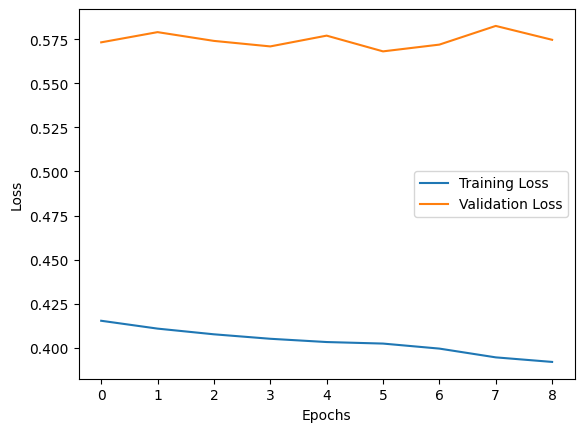

In [27]:
history_df = pd.DataFrame(history.history)

# Q18: Plot the model's training history
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Q19: Evaluate the model's performance using the test data


In [28]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

15/15 [==============================] - 0s 4ms/step - loss: 0.5109 - accuracy: 0.7417
Test Loss: 0.5108885169029236
Test Accuracy: 0.7416666746139526
